# Compulsory Assignment 01
### Fábio Rodrigues Pereira
- fabio.rodrigues.pereira@nmbu.no
- GitLab: @fabiorodp
- Python file: https://gitlab.com/fabiorodp/dat200_applied_machine_learning/compulsory_assignments/CA01/compulsory_assignments/CA01/CA01_Fabio_Rodrigues_Pereira.py

In [35]:
# -*- coding: utf-8 -*-

"""
Compulsory Assignment 01 for the course DAT200 at NMBU in Norway.

Tasks:

1. Use Pandas to read the data stored in each Excel file into Pandas
dataframes. You will see that some dataframes will contain missing
values.

2. Write a script that produces a print screen output as shown in
file CA1_results.pdf. You will need to consult the Pandas documentation
or other resources to find the code that handles missing values and that
does what is requested from you.

3. Remove rows with missing values from all dataframes. If dataframe A
for example has missing values in row named 'obj 5', then this row also
must be removed from all other dataframes, B, C and D. Do this for all
rows that have missing values. A total of 12 rows should be removed
from each dataframe, resulting in 188 rows in each dataframe.

4. Make plots from the reduced dataframes containing only 188 rows.
- Scatter matrix plot for dataframe A without missing values;
- Histograms for dataframe B without missing values;
- Violin plot for dataframe C without missing values;
- Heatmap of correlations of dataframe D without missing values.
"""

__author__ = 'Fábio Rodrigues Pereira'
__email__ = 'fabio.rodrigues.pereira@nmbu.no'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Gets the excel data and creates pandas data frames:
A = pd.read_excel('https://gitlab.com/fabiorodp/dat200_applied_machine_learning'
                  '/-/raw/master/compulsory_assignments/CA01/A.xlsx', 
                  index_col='id')

B = pd.read_excel('https://gitlab.com/fabiorodp/dat200_applied_machine_learning'
                  '/-/raw/master/compulsory_assignments/CA01/B.xlsx', 
                  index_col='id')

C = pd.read_excel('https://gitlab.com/fabiorodp/dat200_applied_machine_learning'
                  '/-/raw/master/compulsory_assignments/CA01/C.xlsx', 
                  index_col='id')

D = pd.read_excel('https://gitlab.com/fabiorodp/dat200_applied_machine_learning'
                  '/-/raw/master/compulsory_assignments/CA01/D.xlsx', 
                  index_col='id')

In [46]:
# Create 2 lists for names and data frames:
names, dfs = ['A', 'B', 'C', 'D'], [A, B, C, D]

In [47]:
# List comprehensions returning in each element:
# 1st: Boolean if any value is missing in each data frame (df);
# 2nd: List with the number of missing values in each column for each df;
# 3rd: List with the total number of missing values for each df;
# 4th: List with the row's id of the missing values for each df:

results = [[df.isnull().values.any() for df in dfs],
           [df.isnull().sum().tolist() for df in dfs],
           [df.isnull().values.sum().tolist() for df in dfs],
           [df[df.isnull().any(axis=1)].index.tolist() for df in dfs]]

# Texts to print:
p = ['Missing values in data frame {}: {}',
     'Number of missing values in each column in {}: {}',
     'Total number of missing values in {}: {}',
     'Id of rows with missing values in {}: {}']

# Print results:
for i in range(4):
    for z in range(4):
        print(p[i].format(names[z], results[i][z]))

Missing values in data frame A: True
Missing values in data frame B: False
Missing values in data frame C: True
Missing values in data frame D: True
Number of missing values in each column in A: [1, 2, 1, 2]
Number of missing values in each column in B: [0, 0, 0, 0, 0, 0, 0]
Number of missing values in each column in C: [4, 3, 4, 3, 0]
Number of missing values in each column in D: [1, 0, 1, 0, 1, 2, 3, 3, 3, 3]
Total number of missing values in A: 6
Total number of missing values in B: 0
Total number of missing values in C: 14
Total number of missing values in D: 17
Id of rows with missing values in A: ['obj 5', 'obj 36', 'obj 120', 'obj 166']
Id of rows with missing values in B: []
Id of rows with missing values in C: ['obj 5', 'obj 138', 'obj 141', 'obj 143']
Id of rows with missing values in D: ['obj 55', 'obj 80', 'obj 120', 'obj 162', 'obj 184', 'obj 185']


In [48]:
# Get the rows with missing values from all dataframes:
drop_list = []
for b in results[3]:
    drop_list += b
drop_list = list(set(drop_list))

# Remove rows with missing values from all dataframes:
for i in dfs:
    i.drop(drop_list, inplace=True)

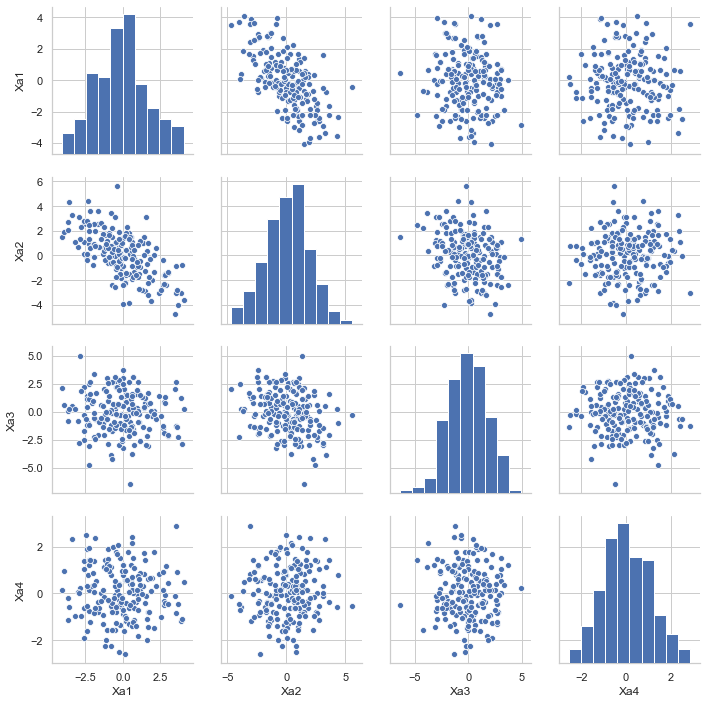

In [49]:
# Scatter matrix plot for data frame A without missing values:
sns.set(style="whitegrid")
sns.pairplot(A)
plt.show()

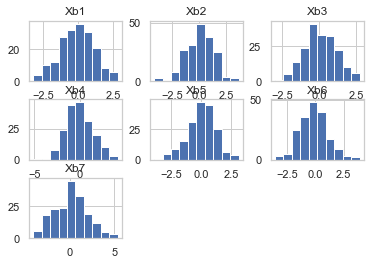

In [50]:
# Histograms for data frame B without missing values:
B.hist()
plt.show()

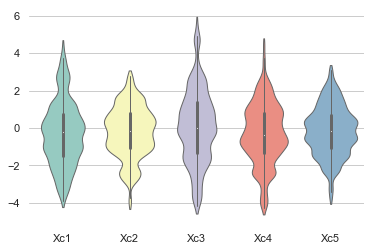

In [51]:
# Violin plot for data frame C, without missing values:
sns.violinplot(data=C, palette="Set3", bw=.2, cut=1, linewidth=1)
sns.despine(left=True, bottom=True)
plt.show()

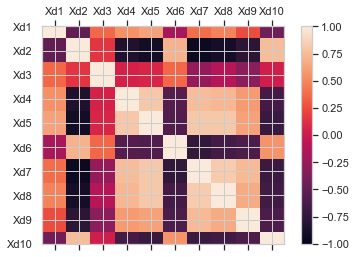

In [52]:
# The correlation Heatmap of data frame D, without missing values:
num_vars = len(D.columns)  # number of variables.
correlations = D.corr()

fig = plt.figure()
ax1 = fig.add_subplot(111)
cax = ax1.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, num_vars, 1)
ax1.set_xticks(ticks)
ax1.set_yticks(ticks)
ax1.set_xticklabels(list(D.columns))
ax1.set_yticklabels(list(D.columns))
plt.show()